# Стационарность

Теперь проверим временной ряд на стационарность. По графику уже можно сказать, что он не стационарен, т.к. можно невооруженным глазом заметить сезонность - цена примерно одинаково меняется в течение одного года.
Для точности воспользуемся тестом Дики-Фуллера, который предоставляет количественную оценку стационарности временного ряда.
Основная (нулевая) гипотеза теста предполагает, что ряд динамики не стационарен. Если p_value будет меньше уровня значимости 0.05, то гипотеза отвергается и ряд может считаться стационарным.

In [ ]:
def check_stationary(column):
    p_value = adfuller(column)[1]
    print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.')
    if p_value > 0.05:
        print(f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной')
    else:
        print(f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергнута в пользу альтернативной. Ряд можно называть стационарным')

In [ ]:
check_stationary(df['Цена на арматуру'])

Полученный уровень значимости (p-value): 0.32.
0.32 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной


Основые способы приведения ряда к стационарности:

1. Дифференцирование: один из самых распространенных методов, именно с помощью дифференцирования ARIMA приводит ряд к стационарности. Этот процесс основывается на вычислении разницы между последовательными наблюдениями во временном ряду. 

2. Сезонное дифференцирование: вариация обычного дифференцирования, которая применяется для данных с сезонной компонентой

3. Логарифмирование: создание логарифма данных может помочь снизить вариативность ряда и сделать его более стационарным. 

## Первый способ
простое дифференцирование

In [ ]:
# Например, для месячных данных с сезонностью 12 месяцев
seasonal_diff = df.copy()
seasonal_diff['Разница цен на арматуру'] = df['Цена на арматуру'].diff()
seasonal_diff = seasonal_diff.dropna()

seasonal_diff

,Цена на арматуру,Разница цен на арматуру
dt,,
2015-01-12,32500,-400.0
2015-01-19,32000,-500.0
2015-01-26,30700,-1300.0
2015-02-02,30300,-400.0
2015-02-09,30300,0.0
...,...,...
2022-08-01,47500,0.0
2022-08-08,49000,1500.0
2022-08-15,47500,-1500.0


In [ ]:
check_stationary(seasonal_diff['Разница цен на арматуру'])

Полученный уровень значимости (p-value): 0.0.
0.0 < 0.05. Нулевая гипотеза отвергнута в пользу альтернативной. Ряд можно называть стационарным


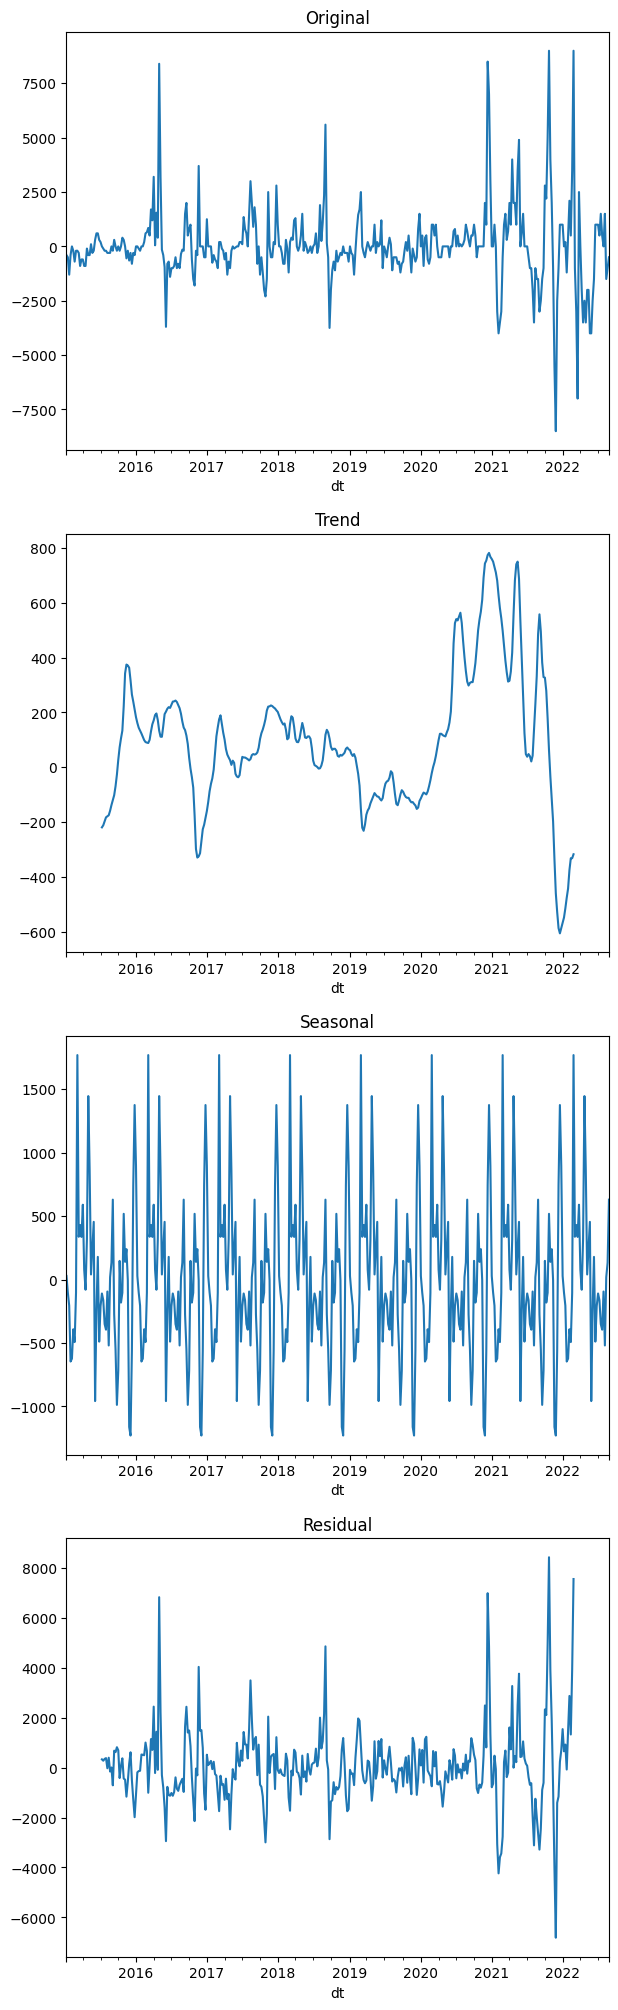

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7, 25))
decompose = seasonal_decompose(seasonal_diff['Разница цен на арматуру']) 

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

## Второй способ
Метод бокскокса, дифференцирование

In [ ]:
from scipy.stats import boxcox
diff_log_df = df.copy()
diff_log_df['log_price'] = np.log(abs(diff_log_df['Цена на арматуру']))
diff_log_df['log_price_boxcox'], lambda_ = boxcox(diff_log_df['log_price'])
diff_log_df['diff_log_boxcox'] = diff_log_df['log_price_boxcox'].diff()
diff_log_df = diff_log_df.dropna()

diff_log_df

,Цена на арматуру,log_price,log_price_boxcox,diff_log_boxcox
dt,,,,
2015-01-12,32500,10.388995,0.147781,-1.549008e-10
2015-01-19,32000,10.373491,0.147781,-1.983760e-10
2015-01-26,30700,10.332018,0.147781,-5.421188e-10
2015-02-02,30300,10.318903,0.147781,-1.749764e-10
2015-02-09,30300,10.318903,0.147781,0.000000e+00
...,...,...,...,...
2022-08-01,47500,10.768485,0.147781,0.000000e+00
2022-08-08,49000,10.799576,0.147781,2.959911e-10
2022-08-15,47500,10.768485,0.147781,-2.959911e-10


In [ ]:
lambda_

-6.766757644288251

In [ ]:
check_stationary(diff_log_df['diff_log_boxcox'])

Полученный уровень значимости (p-value): 0.0.
0.0 < 0.05. Нулевая гипотеза отвергнута в пользу альтернативной. Ряд можно называть стационарным


<Axes: xlabel='dt'>

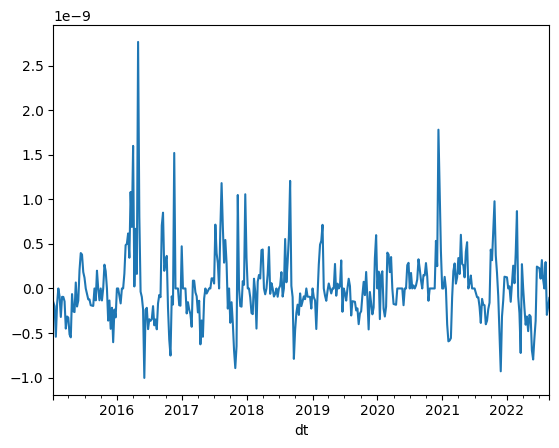

In [ ]:
diff_log_df['diff_log_boxcox'].plot()

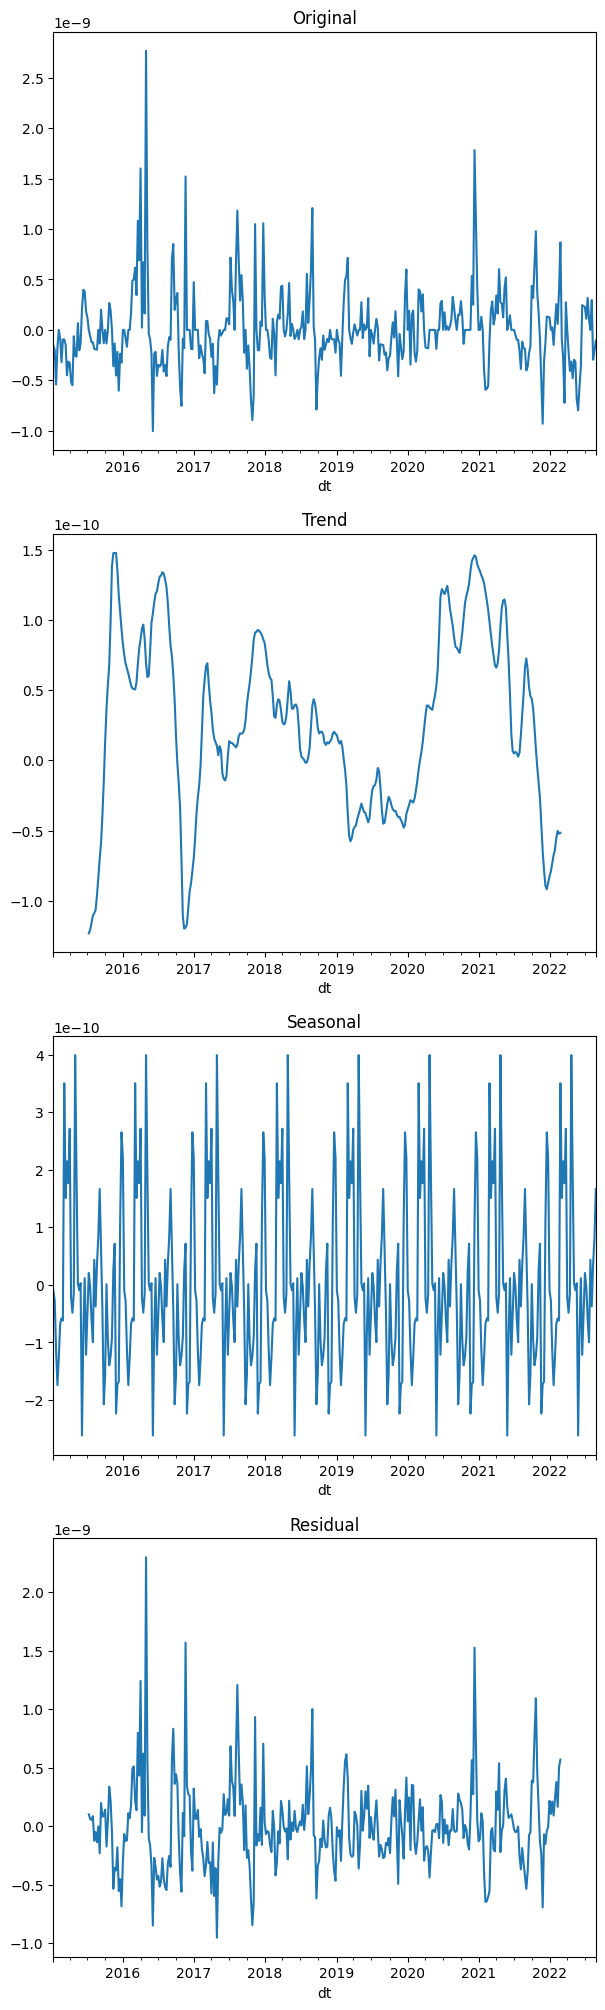

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7, 25))
decompose = seasonal_decompose(diff_log_df['diff_log_boxcox']) 

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

## Третий способ (лучший)
скользящая точка, логарифмирование и дифференцирование


## возвращение значений обратно

**Для того чтобы выполнить обратную обработку предсказанных данных, я выполню следующие шаги:**
-----------------------------------

**Шаг 1: Обратное дифференцирование**

Для этого:

1.1 получаю последнее значение из колонки с логарифмированными и нормализованными данными

1.2 для каждой предсказанной цены, считаю среднее между суммой предсказания с последним, и последнеим (чем последним - см выше)

$$
\text{RLN} = \frac{(\text{value}_i + \text{LLG}) + \text{LLG}}{2}
$$

где:
- `RLN`: переменная с обратно дифференцированым массивом
- `LLG`: последнее значение из датафрейма с нормализованными и логарифмированными данными
- `value_i` каждый предикт


**Шаг 2: Обратное логарифмирование:**
Экспонента каждого элемента - 1е-10 (мин значение)
$$
\mathbf{restored\_array}[i] = e^{\mathbf{log\_array}[i]}-{1e^{-10}}
$$
где:
- `i`: элемент массива

**Шаг 3: Обратное нормализирование:**

Для этого, я получу последнее значение плавающей точки, и умножу каждый элемент на него

$$
\text{RP} = \mathbf{restored\_array}[i] * \text{LRstd}
$$

где:
- `RP`: востановленная цена (restored price)
- `restorred_array`: восстановленный массив с прошлого шага
- `LRstd`: последнее значение плавающей точки

In [ ]:
predictions

array([68915.48492204, 68349.68146858, 66579.84522641, 65372.03921269,
       62574.07028027, 61222.75972712, 60761.43912995, 60679.6482757 ,
       60746.39491026, 60735.65757647, 58969.55463621, 57412.13412242,
       58622.08708985, 60132.32357648, 60178.26924934, 59732.74490257,
       59570.15454897, 59565.52668303, 52927.65358003, 51819.39247841,
       52423.8234927 , 53461.38278715, 53885.82739036, 56091.03858071,
       56453.08515864, 57317.25001476, 57115.93265827, 57553.12016759,
       59946.63416524, 61189.52271318, 63505.70822099, 66036.57310772,
       68310.4217381 , 68608.85257019, 68632.76127497, 67122.93193317,
       66762.55756796, 66629.3387067 , 67579.06436405, 69530.35176188,
       67641.22339178, 67030.94148612, 65416.45304606, 64273.7040895 ,
       59918.50365003, 57075.02812988, 55255.44468014, 53287.22748838,
       46112.41224119, 45754.69805225, 42816.86321419, 45744.52714104,
       46244.71126933, 43523.64111155, 42124.94016014, 42172.29799032,
      

In [ ]:
# Выберите первый элемент теста
test_index = test.index[0]
true_value = df.loc[test_index, 'Цена на арматуру']

# Восстановите предсказание вручную
last_log = train['log_normalized_price'].iloc[-1]
pred_diff = predictions[0]  # Первое предсказанное diff
reversed_log = last_log + pred_diff
reversed_normalized = np.exp(reversed_log) - 1e-10

window = 12
# Вычислите rolling_std только на исторических данных
history_std = train['Цена на арматуру'].iloc[-window:].std()
reversed_price = reversed_normalized * (history_std if history_std != 0 else 1)

print(f"Предсказание: {reversed_price:.2f}, Истинное: {true_value:.2f}")

KeyError: 'log_normalized_price'

In [ ]:
def inverse_transform(predictions, train, window):
    if len(predictions) == 0:
        return np.array([])
    
    # Проверка соответствия размеров
    if len(predictions) > len(train):
        raise ValueError("len(predictions) не может превышать len(train)")
    
    # Последнее значение log_normalized_price из train
    last_log = train["log_normalized_price"].iloc[-1]
    
    # Интегрируем предсказания
    reversed_log = np.concatenate([[last_log], predictions]).cumsum()[1:]
    reversed_normalized = np.exp(reversed_log) - 1e-10
    
    # Расчёт rolling_std для каждого шага прогноза
    rolling_std_values = []
    for i in range(len(predictions)):
        end_idx = len(train) - len(predictions) + i + 1
        window_data = train["Цена на арматуру"].iloc[end_idx - window:end_idx]
        current_std = window_data.std()
        rolling_std_values.append(current_std if current_std != 0 else 1)
    
    # Отмена нормализации
    final_predictions = reversed_normalized * np.array(rolling_std_values)
    
    return final_predictions



In [ ]:
len(predictions)

80

In [ ]:
train.shape[0]

318

In [ ]:
train['log_normalized_price'].iloc[train.shape[0]-1]

1.9460562013559188

In [ ]:
train.describe()

,Цена на арматуру,rolling_std,normalized_price,log_normalized_price,diff_log,year,month,day,quarter,lag_1,lag_2,lag_3,lag_6,lag_12
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,317.000000,316.000000,315.000000,312.000000,306.000000
mean,33826.698113,1947.396497,29.116242,3.133651,-0.008799,2017.594340,6.446541,15.707547,2.487421,-0.009129,-0.009285,-0.009334,-0.009097,-0.003068
std,7218.491072,1778.063987,21.992327,0.689028,0.186269,1.758862,3.474373,8.804537,1.125346,0.186470,0.186745,0.187040,0.187902,0.180917
min,21000.000000,217.422923,5.520732,1.708510,-0.854081,2015.000000,1.000000,1.000000,1.000000,-0.854081,-0.854081,-0.854081,-0.854081,-0.793967
25%,29800.000000,911.630446,14.453436,2.670932,-0.087122,2016.000000,3.000000,8.000000,1.000000,-0.087149,-0.087159,-0.087170,-0.087735,-0.079653
50%,33500.000000,1382.341692,22.902178,3.131231,-0.003940,2018.000000,6.000000,16.000000,2.000000,-0.004240,-0.004303,-0.004365,-0.004303,-0.002916
75%,37700.000000,2104.850943,35.273065,3.563099,0.083903,2019.000000,9.000000,23.000000,3.000000,0.083443,0.083596,0.083750,0.084884,0.092343
max,62000.000000,10210.196181,131.897336,4.882024,0.885311,2021.000000,12.000000,31.000000,4.000000,0.885311,0.885311,0.885311,0.885311,0.885311


In [ ]:
# window = 12  # Например, 12 для месячных данных

# df_roll = df.copy()
# df_roll['rolling_std'] = df_roll['Цена на арматуру'].rolling(window=window).std()

# # Нормализуем данные
# df_roll['normalized_price'] = df_roll['Цена на арматуру'] / df_roll['rolling_std']

# # Затем логарифмируем и дифференцируем
# df_roll['log_normalized_price'] = np.log(df_roll['normalized_price'] + 1e-10)  # Добавляем константу, чтобы избежать нулей
# df_roll['Цена на арматуру'] = df_roll['log_normalized_price'].diff().dropna()

# df_roll = df_roll.dropna()
# ----------------------------------



In [ ]:
window = 12
df_roll = df.copy(deep=True)

# Скользящее STD с min_periods=1 и заменой нулей
df_roll["rolling_std"] = (
    df_roll["Цена на арматуру"]
    .rolling(window=window, min_periods=1)
    .std()
    .replace(0, 1)
)

# Нормализация
df_roll["normalized_price"] = df_roll["Цена на арматуру"] / df_roll["rolling_std"]

# Логарифмирование
df_roll["log_normalized_price"] = np.log(df_roll["normalized_price"] + 1e-10)
# df_roll["log_normalized_price"] = np.log(df_roll["Цена на арматуру"] + 1e-10)

# Дифференцирование
df_roll["diff_log"] = df_roll["log_normalized_price"].diff().dropna()
df_roll = df_roll.dropna()
df_roll

,Цена на арматуру,rolling_std,normalized_price,log_normalized_price,diff_log
dt,,,,,
2015-01-19,32000,450.924975,70.965242,4.262190,-0.481914
2015-01-26,30700,956.991815,32.079689,3.468223,-0.793967
2015-02-02,30300,1132.254388,26.760771,3.286937,-0.181286
2015-02-09,30300,1158.878768,26.145962,3.263695,-0.023242
2015-02-16,30100,1174.531315,25.627243,3.243656,-0.020039
...,...,...,...,...,...
2022-08-01,47500,3320.049288,14.307017,2.660750,0.271592
2022-08-08,49000,2461.829820,19.903894,2.990915,0.330165
2022-08-15,47500,2165.063509,21.939310,3.088280,0.097365


<Axes: xlabel='dt'>

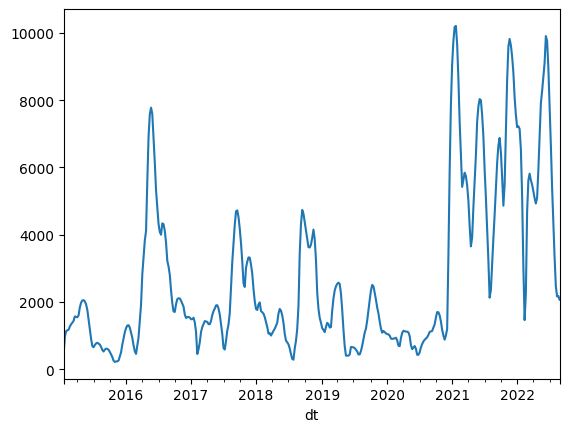

In [ ]:
df_roll['rolling_std'].plot()

In [ ]:
df_roll.describe()

,Цена на арматуру,rolling_std,normalized_price,log_normalized_price,diff_log
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,39262.286432,2746.862186,25.728514,2.984792,-0.004126
std,13433.671089,2442.624689,21.001788,0.713753,0.188321
min,21000.000000,217.422923,4.239242,1.444384,-0.854081
25%,31025.000000,1055.083479,10.948815,2.393229,-0.090191
50%,35550.000000,1695.716507,19.920305,2.991739,-0.003327
75%,42000.000000,4061.739353,32.461579,3.480056,0.095395
max,79000.000000,10210.196181,131.897336,4.882024,0.885311


In [ ]:
check_stationary(df_roll['diff_log'])

Полученный уровень значимости (p-value): 0.0.
0.0 < 0.05. Нулевая гипотеза отвергнута в пользу альтернативной. Ряд можно называть стационарным


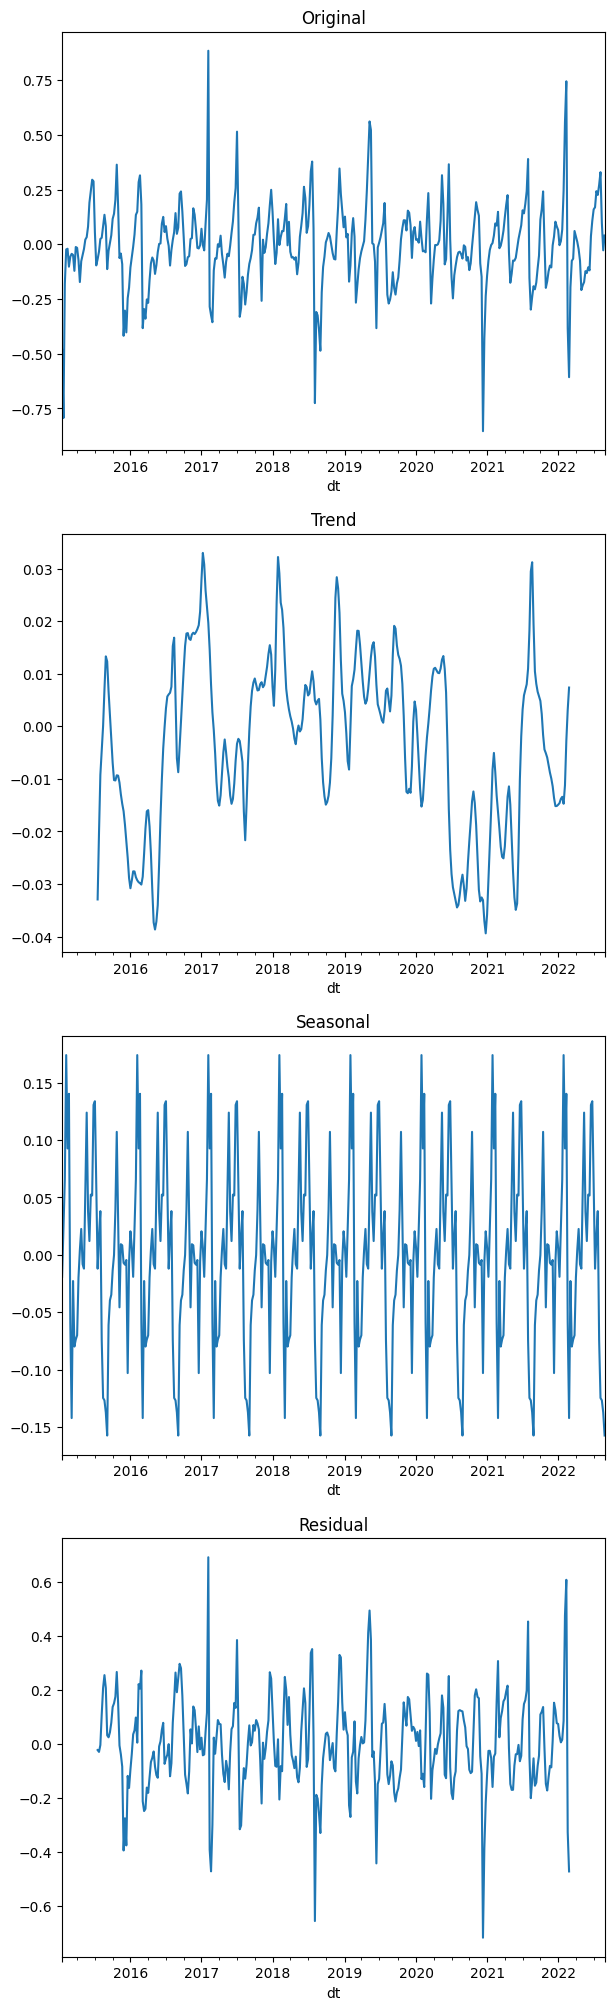

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(7, 25))
decompose = seasonal_decompose(df_roll['diff_log']) 

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);